## Analysis 4

1. Relationship between age and reported injuries


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [63]:
#Reading the required files
df1=pd.read_csv(r"NEISS data/NEISS2014.csv")
df2=pd.read_csv(r"NEISS data/BodyParts.csv")

In [64]:
#Performing a left join to combine the body part code of df1 with the body part name in df2
df3=pd.merge(df1,df2, how="left", left_on="body_part",right_on="Code")

In [65]:
#Ages less than two years are coded as 200 (2 followed by months) and above
#So we can assume values greater than 200 as 1 (mean age = 1 yr.) and retain other values 
#Creating a new column for this purpose
df3.loc[df1['age']==0,'age_year'] = 1
df3.loc[df1['age']>=200,'age_year'] = 1
df3.loc[(df1['age']<200)&(df1['age']>0),'age_year'] = df1['age']

In [66]:
#Creating bins of ages to categorize people into various groups and find what injuries they encounter
ranges = [0,2,12,18,65,150]
age_groups = ['Infant', 'Children', 'Adolescents', 'Adults','Older Adults']
categories = pd.cut(df3['age_year'], ranges, labels=age_groups)
df3['categories'] = pd.cut(df3['age_year'], ranges, labels=age_groups)

In [67]:
#Calculating number of people injured in each category based on body part 
df5=df3.groupby(['categories','BodyPart'])['BodyPart'].agg(['count']).reset_index()
df5=df5.rename(columns={'count':'Frequency'})

In [68]:
#Sorting for each age group
df6=df5.sort_values(['categories','Frequency'],ascending=[True,False]).reset_index(drop=True)
df7=df6.groupby(['categories'])['categories','Frequency'].agg(['sum']).reset_index()
df7.columns=df7.columns.droplevel(1)
df7=df7.rename(columns={'Frequency':'Total Frequency'})
df6=pd.merge(df6,df7,how="left", on="categories")
df6['Freq %']=df6['Frequency']/df6['Total Frequency']*100
for i in age_groups:
    print(df6.loc[df6['categories']==i,].head(3))

  categories      BodyPart  Frequency  Total Frequency     Freq %
0     Infant          Head       1756             5753  30.523205
1     Infant          Face       1220             5753  21.206327
2     Infant  >50% of body        461             5753   8.013210
   categories BodyPart  Frequency  Total Frequency     Freq %
26   Children     Head       2369            14228  16.650267
27   Children     Face       1999            14228  14.049761
28   Children   Finger       1230            14228   8.644925
     categories BodyPart  Frequency  Total Frequency     Freq %
51  Adolescents     Head       1141             8716  13.090867
52  Adolescents    Ankle        996             8716  11.427260
53  Adolescents   Finger        880             8716  10.096374
   categories      BodyPart  Frequency  Total Frequency     Freq %
76     Adults  Trunk, lower       3352            27664  12.116831
77     Adults        Finger       2913            27664  10.529931
78     Adults          Head    

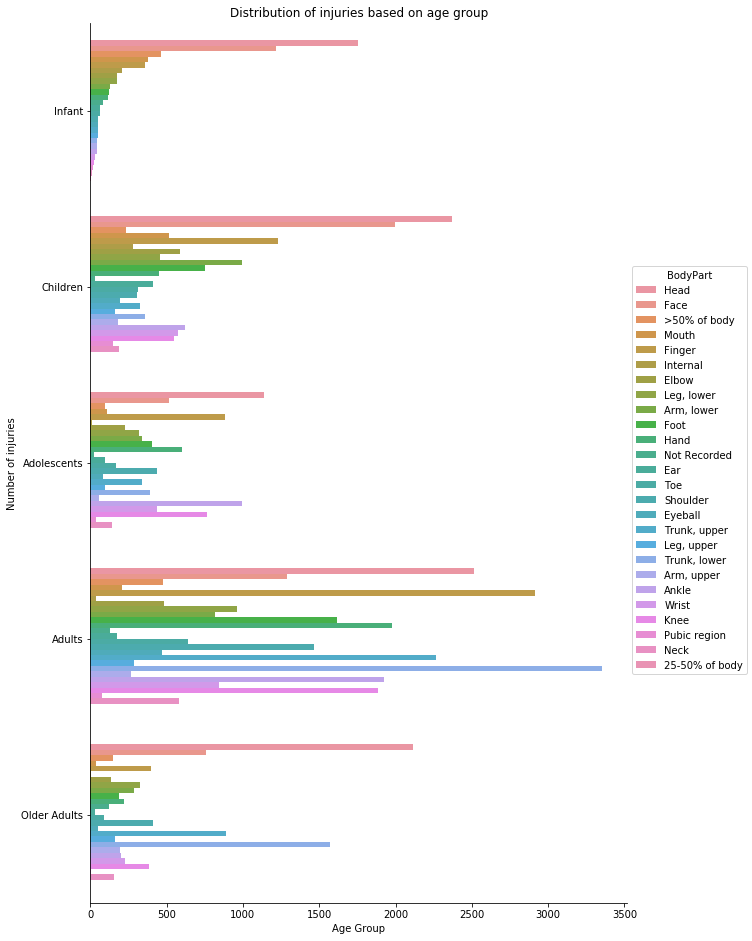

In [69]:
#Visualizing data 
g=sb.factorplot(x="Frequency",y="categories",hue="BodyPart",data=df6,size=13,aspect=0.7,kind="bar",legend=True)

plt.title('Distribution of injuries based on age group')
plt.xlabel('Age Group')
plt.ylabel('Number of injuries')
plt.show()

### Conclusion

* We see that infants and children have more injuries on head and face as they often fall while playing and hurt themselves.
* But for adults, most injuries are in lower trunk and fingers, possibly occuring during physical activities.
* As people grow older, we again notice more head injuries which might be due to weakness and lack of support.
* We also observe that maximum number of injuries are for adults as compared to other age groups